In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor

In [4]:
le = LabelEncoder()
scaler = StandardScaler()
model = LinearRegression()
model2 = LinearRegression()
poly = PolynomialFeatures(degree = 5)
rd = Ridge()
ls = Lasso()
dtr = DecisionTreeRegressor()

In [5]:
df = pd.read_csv(r"C:\Users\Yagnesh Narola\Documents\Coding Languages\Artificial Intelligence\Excel_and_CSV\car_price_prediction.csv")

In [6]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [8]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [9]:
df2 = df.copy()

In [10]:
df2 = df2.drop(columns = 'ID')

In [11]:
dfobj = df2.select_dtypes(include = 'object')

In [12]:
for i in df[dfobj.columns]:
    df2[i] = le.fit_transform(df2[i])

In [13]:
df2

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,114,32,1242,2010,4,1,2,63,2838,6.0,0,0,1,0,12,12
1,16621,4,8,658,2011,4,0,5,56,2960,6.0,2,0,1,0,1,8
2,8467,0,21,684,2006,3,0,5,22,3140,4.0,3,1,1,1,1,2
3,3607,512,16,661,2011,4,1,2,46,2413,4.0,0,0,1,0,14,0
4,11726,366,21,684,2014,3,1,5,22,7396,4.0,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,36,385,1999,1,1,0,37,4394,4.0,1,2,0,0,12,5
19233,15681,504,23,1334,2011,9,1,5,44,2214,4.0,2,1,1,0,11,8
19234,26108,508,23,1442,2010,4,1,1,36,638,4.0,0,1,1,0,7,4
19235,5331,83,8,456,2007,4,1,1,36,5612,4.0,0,1,1,0,1,4


<Axes: ylabel='Price'>

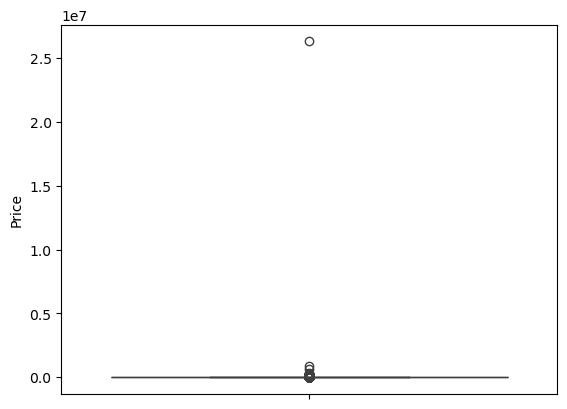

In [14]:
sns.boxplot(df['Price'])

In [15]:
def outliers(df,columns):
    q1 = df[columns].quantile(0.25)
    q3 = df[columns].quantile(0.75)
    iqr = q3 - q1    
    upperlimit = q3 + (1.5 * iqr)
    lowerlimit = q1 - (1.5 * iqr)
    df[columns] = df[columns].clip(lower=lowerlimit, upper=upperlimit)
    return df[columns]
cols = ['Price','Prod.year','Cylinders','Airbags']
for i in df2.columns:
    df2[i] = outliers(df2,i)

In [16]:
df2

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,114,32,1242,2010,4,1,2,63,2838,4.0,0.0,1,1,0,12,12
1,16621,4,8,658,2011,4,0,5,56,2960,4.0,2.0,1,1,0,1,8
2,8467,0,21,684,2006,3,0,5,22,3140,4.0,2.5,1,1,0,1,2
3,3607,512,16,661,2011,4,1,2,46,2413,4.0,0.0,1,1,0,14,0
4,11726,366,21,684,2014,3,1,5,22,7396,4.0,0.0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,36,385,2000,1,1,0,37,4394,4.0,1.0,1,1,0,12,5
19233,15681,504,23,1334,2011,9,1,5,44,2214,4.0,2.0,1,1,0,11,8
19234,26108,508,23,1442,2010,4,1,1,36,638,4.0,0.0,1,1,0,7,4
19235,5331,83,8,456,2007,4,1,1,36,5612,4.0,0.0,1,1,0,1,4


<Axes: >

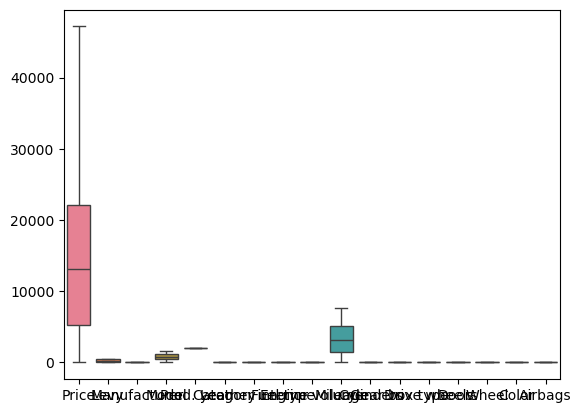

In [17]:
sns.boxplot(df2)

In [18]:
df2.describe(),df.describe()

(              Price          Levy  Manufacturer         Model    Prod. year  \
 count  19237.000000  19237.000000  19237.000000  19237.000000  19237.000000   
 mean   15874.853200    235.856578     33.080678    862.592348   2011.147944   
 std    13422.692902    217.603981     17.766465    410.812287      4.871092   
 min        1.000000      0.000000      0.000000      0.000000   2000.000000   
 25%     5331.000000      0.000000     21.000000    537.000000   2009.000000   
 50%    13172.000000    207.000000     32.000000    834.000000   2012.000000   
 75%    22075.000000    458.000000     54.000000   1226.000000   2015.000000   
 max    47191.000000    558.000000     64.000000   1589.000000   2020.000000   
 
            Category  Leather interior     Fuel type  Engine volume  \
 count  19237.000000      19237.000000  19237.000000   19237.000000   
 mean       6.265582          0.725373      3.432396      40.665748   
 std        2.790570          0.446338      1.807388      13.2608

In [19]:
x = df2.drop(columns = 'Price')
y = df2['Price']

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 70,test_size = 30)

In [21]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)
model.fit(xtrainscaled,ytrain)
linear = model.score(xtestscaled,ytest)

In [ ]:
poly.fit(xtrain)
xtrainpoly = poly.transform(xtrain)
xtestpoly = poly.transform(xtest)
model2.fit(xtrainpoly,ytrain)
polys = model2.score(xtestpoly,ytest)

In [ ]:
rd.fit(xtrainscaled,ytrain)
ridge = rd.score(xtestscaled,ytest)

NameError: name 'rd' is not defined

In [ ]:
ls.fit(xtrainscaled,ytrain)
lasso = ls.score(xtestscaled,ytest)

In [ ]:
dtr.fit(xtrainscaled,ytrain)
decision = dtr.score(xtestscaled,ytest)

In [ ]:
print("Linear Regression:",linear)
print("Polynomial Features Regression:",polys)
print("Ridge Regression:",ridge)
print("Lasso Regression:",lasso)
print("DecisionTree Regression:",decision)